In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from math import pi
import math

In [2]:
nameImage = input("Enter name of image with extension ")
imageArray = cv2.imread('./'+nameImage)
grayImage = cv2.cvtColor(imageArray, cv2.COLOR_BGR2GRAY)
print("Image Array Sample",imageArray[:1])
print("Image Array Dimension ",imageArray.shape)

Enter name of image with extension road.png
Image Array Sample [[[244 244 244]
  [244 244 244]
  [245 245 245]
  ...
  [131 131 131]
  [130 130 130]
  [130 130 130]]]
Image Array Dimension  (407, 548, 3)


In [3]:
def gaussianFilter(standardDeviation):
    if(standardDeviation == 0):
        raise ZeroDivisionError("Standard Deviation of Zero Not Allowed")
    filterDimension = 6*standardDeviation +1
    Filter = np.zeros((filterDimension,filterDimension))
    normalizationCoefficient = (1/(2*pi*(standardDeviation**2)))
    i = j = 0
    midpointX0 = filterDimension//2 
    midpointY0 = filterDimension//2
    precision = 0
    for i in range(filterDimension):
        for j in range(filterDimension):
            Filter[i][j] = (normalizationCoefficient)*np.exp(-1*((((i-midpointX0)**2)/(2*standardDeviation**2))+(((j-midpointY0)**2)/(2*standardDeviation**2))))
    return Filter

Enter the standard Deviation 2


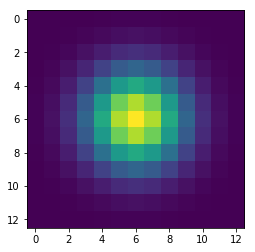

In [4]:
standardDeviation = int(input("Enter the standard Deviation "))
Filter = gaussianFilter(standardDeviation)
plt.imshow(Filter)
plt.show()

In [5]:
def gaussianBlur(grayImage, Filter):
    x_padding = Filter.shape[0]//2
    y_padding = Filter.shape[1]//2
    x = np.zeros((x_padding*2+grayImage.shape[0],y_padding*2+grayImage.shape[1])) 
    x[ x_padding : grayImage.shape[0] + x_padding , y_padding : grayImage.shape[1] + y_padding] = np.copy(grayImage)
    newImage = np.zeros((grayImage.shape[0],grayImage.shape[1]))
    for i in range(len(newImage)):
        for j in range(len(newImage[0])):
            add = 0
            for a in range(Filter.shape[0]):
                for b in range(Filter.shape[1]):
                    add += x[i+a][j+b]*Filter[a][b]
            if add >= 255:
                newImage[i][j] = 255
            newImage[i][j] = add
    return newImage

In [6]:
image = gaussianBlur(grayImage,Filter)

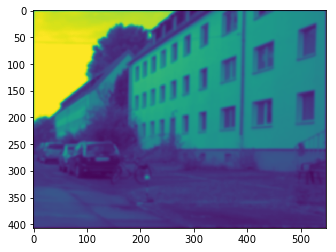

In [7]:
plt.imshow(image)
plt.show()
# cv2.imwrite('./kangaroo'+str(standardDeviation)+'.png',image)